# Comparing Regionally Split Scenarios with Global Scenario

In [1]:
import pandas as pd

import pymagicc
from pymagicc import MAGICC6
from pymagicc.io import MAGICCData
from pymagicc.scenarios import (
    rcp26, rcp45, rcp60, rcp85
)

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 16, 9

In [3]:
pymagicc.__version__

'2.0.0-alpha.1+180.ge1103b4.dirty'

model  scenario  region                           variable             unit  climate_model  todo
IMAGE  RCP26     World                            Surface Temperature  K     MAGICC6        N/A     0.010562
                 World|Northern Hemisphere|Land   Surface Temperature  K     MAGICC6        N/A     0.022406
                 World|Northern Hemisphere|Ocean  Surface Temperature  K     MAGICC6        N/A     0.016199
                 World|Southern Hemisphere|Land   Surface Temperature  K     MAGICC6        N/A     0.006166
                 World|Southern Hemisphere|Ocean  Surface Temperature  K     MAGICC6        N/A     0.002733
dtype: float64
model    scenario  region                           variable             unit  climate_model  todo
MiniCAM  RCP45     World                            Surface Temperature  K     MAGICC6        N/A     0.008971
                   World|Northern Hemisphere|Land   Surface Temperature  K     MAGICC6        N/A     0.018540
                   Wor

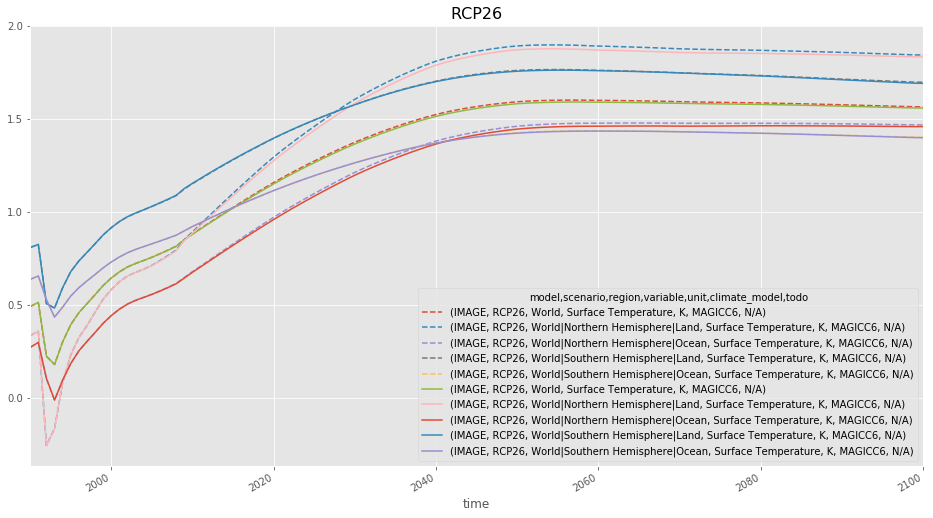

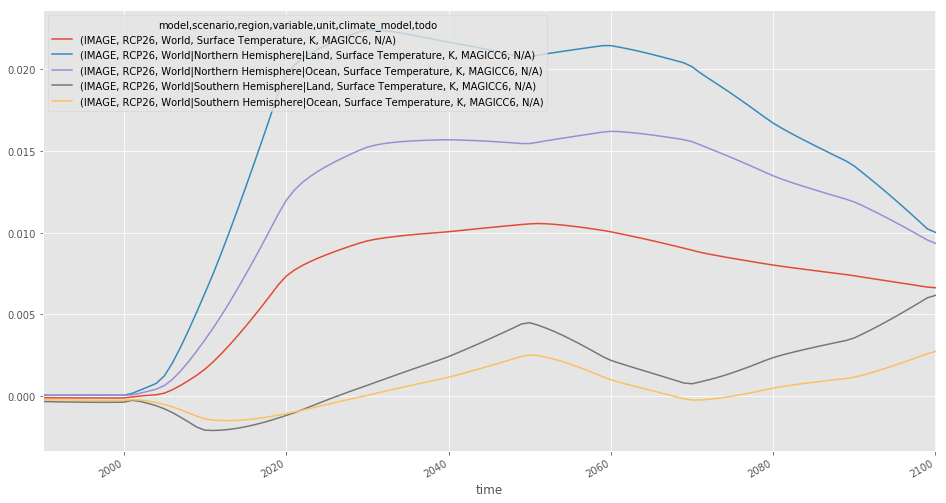

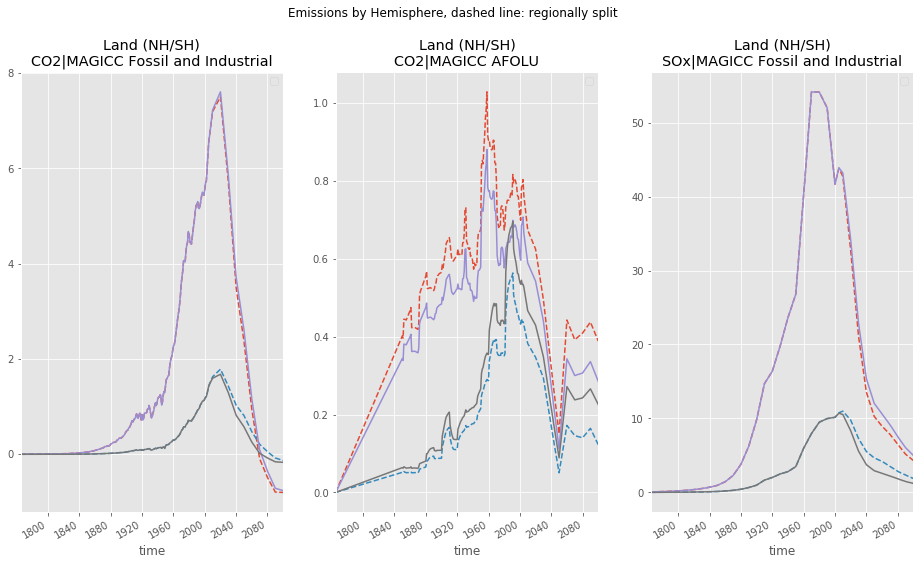

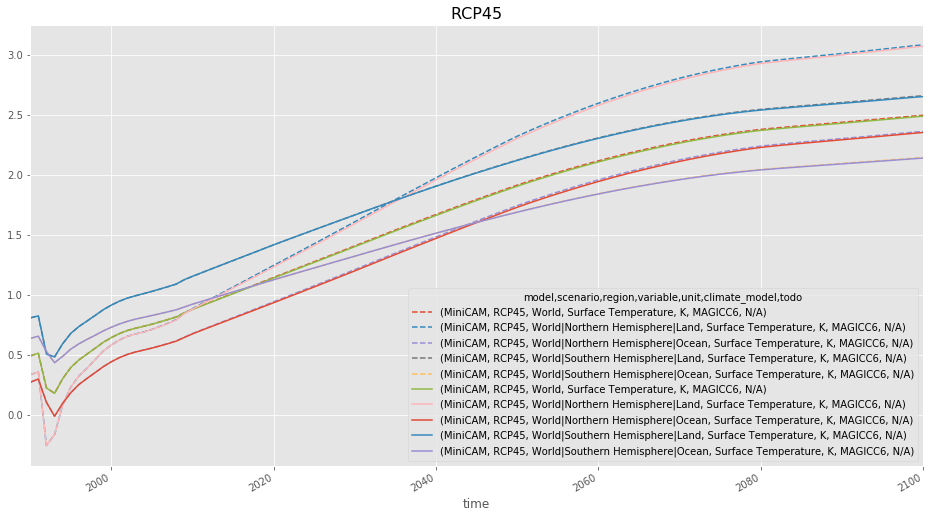

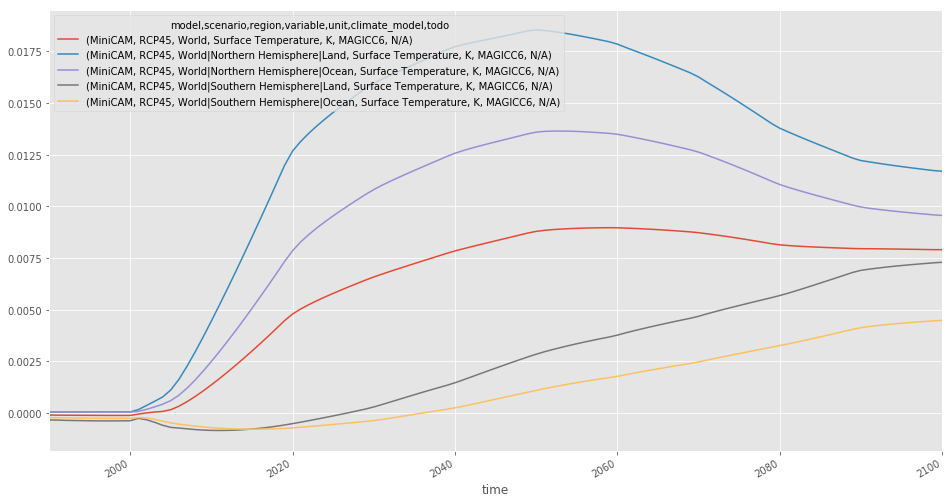

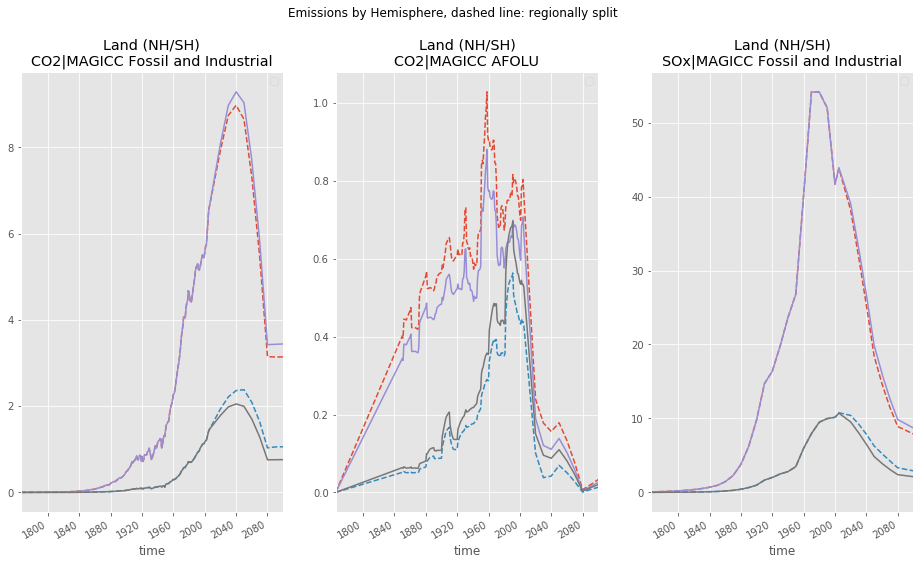

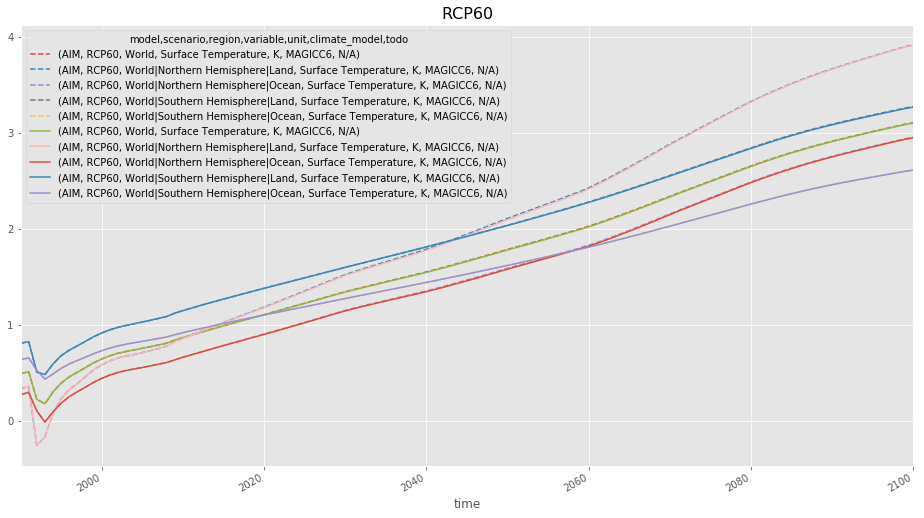

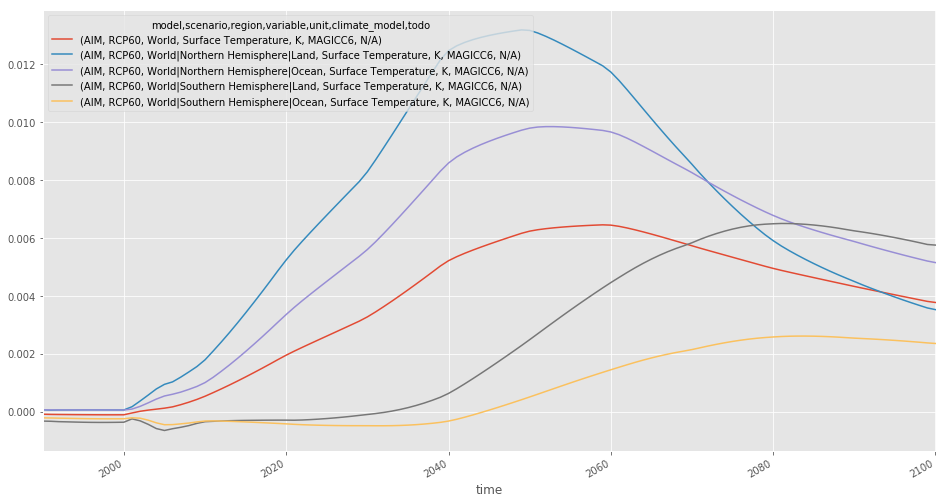

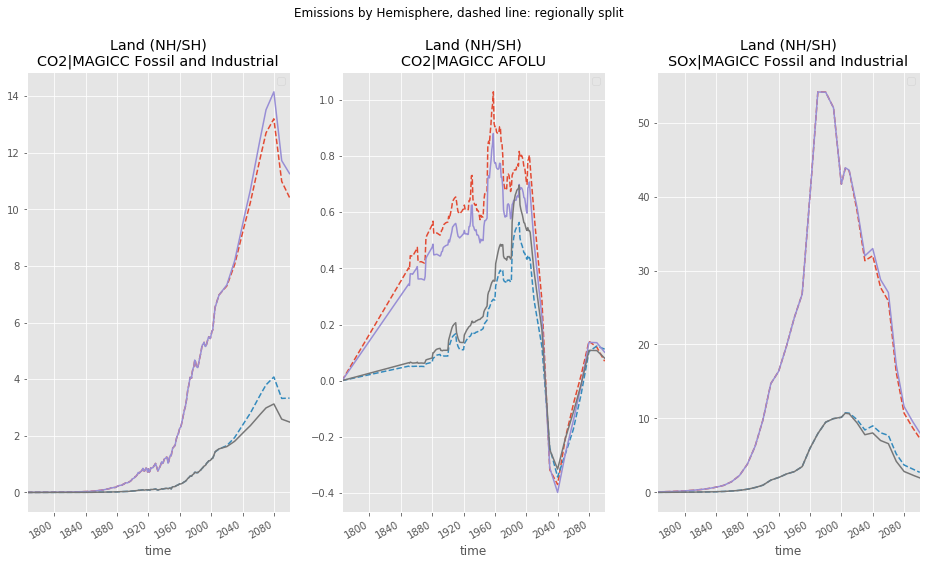

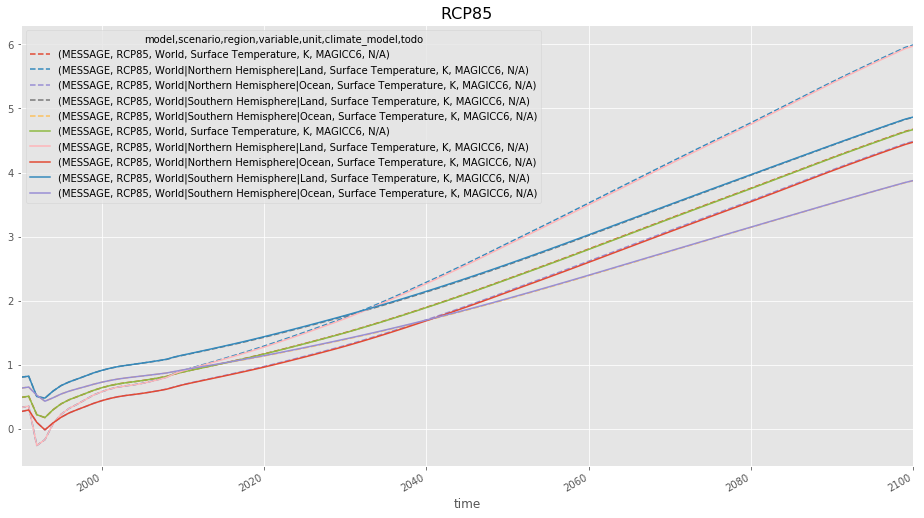

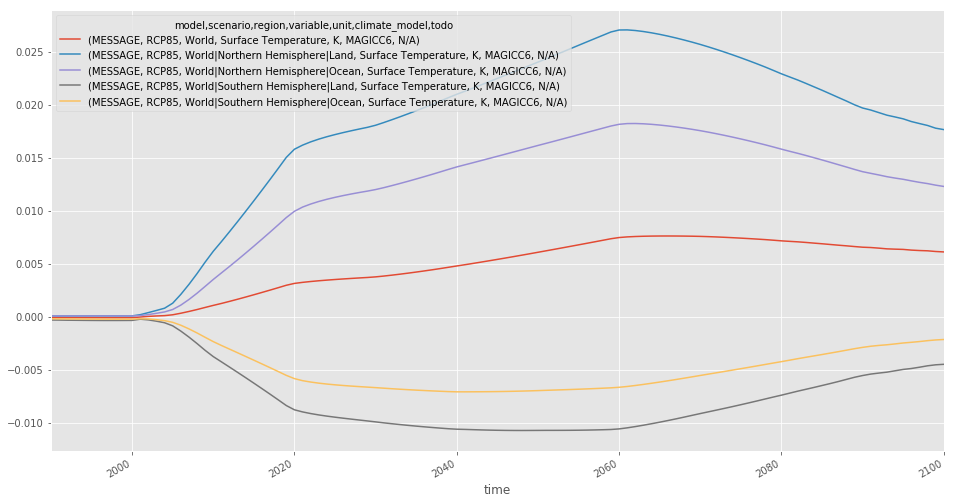

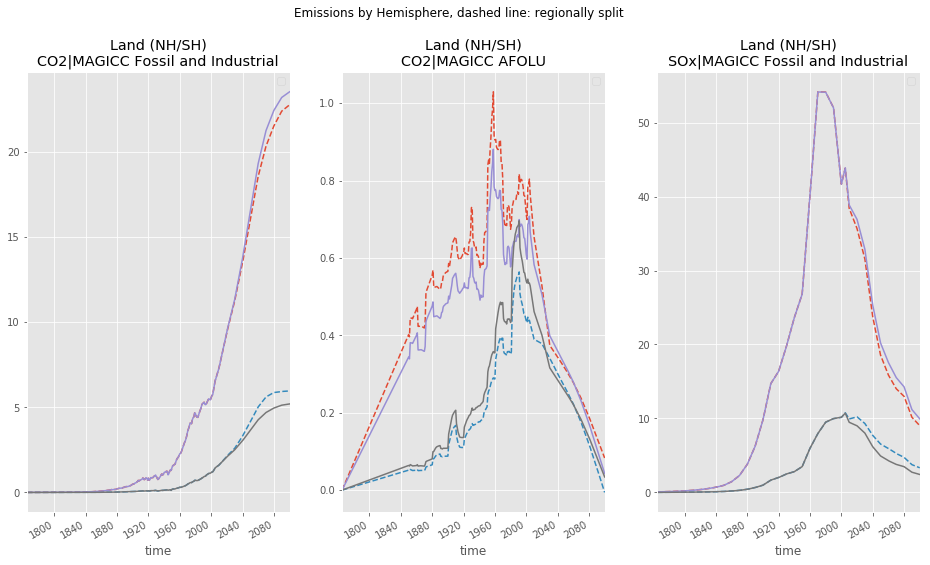

In [4]:
for rcp in [rcp26, rcp45, rcp60, rcp85]:
# for rcp in [rcp26]:

    results = pymagicc.run(rcp, out_emissions=1)

    temp = results.filter(variable="Surface Temperature", region="World*", year=range(1990, 2101))

    ts = temp.timeseries()

    rcp_world = rcp.copy().filter(region="World")

    results_world = pymagicc.run(rcp_world, out_emissions=1)

    temp = results_world.filter(variable="Surface Temperature", region="World*", year=range(1990, 2101))

    ts_world = temp.timeseries()

    _, ax = plt.subplots()
    ts.T.plot(style="--", ax=ax)
    ts_world.T.plot(ax=ax)
    ax.set_title(rcp.meta.scenario.iloc[0], fontsize=16)
    
    _, ax = plt.subplots()
    (ts.T - ts_world.T).plot(ax=ax)
    print((ts_world - ts).T.abs().max())
   
    fig, ax = plt.subplots(1, 3)
    fig.suptitle("Emissions by Hemisphere, dashed line: regionally split")
    region = "World|*Land*"
    for idx, var in enumerate([
        "Emissions|CO2|MAGICC Fossil and Industrial",
        "Emissions|CO2|MAGICC AFOLU",
        "Emissions|SOx|MAGICC Fossil and Industrial"
    ]):
        
        results.filter(
            variable=var, 
            region=region).timeseries().T.plot(style="--", ax=ax[idx])
        results_world.filter(
            variable=var,
            region=region).timeseries().T.plot(ax=ax[idx])
        ax[idx].set_title("Land (NH/SH)\n" + var.replace("Emissions|", ""))
    
        ax[idx].legend("")